In [18]:
from PIL import Image
from numpy import asarray
from numpy import save
from numpy import load
from numpy import savez_compressed

from matplotlib import image
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import random
import copy
from scipy.ndimage import gaussian_filter
plt.style.use('default')


In [2]:
def StringtoArray(pd_string, reshape = True):
    '''
    Function to store all string info form the panda dataframe image column to np array format,
    reshape to decide if each array is reshaped to 96x96 or not.'''
    image_data = []
    
    if reshape: 
        for i in range(len(pd_string)):
            image_array = np.fromstring(pd_string.iloc[i,-1], dtype=int, sep=' ')  # string to 1D array
            image_array = np.reshape(image_array, (96, 96))  # 1D array to 2D array
            image_data.append(image_array)  # 3D
            
    else:
        for i in range(len(pd_string)):
            image_array = np.fromstring(pd_string.iloc[i,-1], dtype=int, sep=' ')  # string to 1D array
            image_data.append(image_array) # 2D
            
            
    image_data = np.array(image_data)  # list to array
           
    return image_data
        
    
def NPY_show(train_data):
    '''
    Function to display a random face image from the npy load data
    '''
    #fig, ax = plt.subplots(figsize=(96, 96))
    
    if len(train_data.shape) == 1:
        image = np.reshape(train_data, (96, 96))  #reshape to 2D array
    else:
        image = train_data
        
        
    plt.imshow(image)
    plt.axis('off')
    
    
def NPY_feature_show(train_data, train_labels):
    '''
    Function to display a random face image with face detection marks from the npy load data
    '''
    #fig, ax = plt.subplots(figsize=(96, 96))
    
    if len(train_data.shape) == 1:
        image = np.reshape(train_data, (96, 96))  #reshape to 2D array
    else:
        image = train_data
        
        
    plt.imshow(image)
    plt.scatter(train_labels[0], train_labels[1], s=20, c = 'y') # left eye center
    plt.scatter(train_labels[2], train_labels[3], s=20, c = 'b') #right eye center
    
    plt.scatter(train_labels[4:8:2], train_labels[5:9:2], s=20, c = 'y', marker = '^') #left eye  4, 6
    plt.scatter(train_labels[8:12:2], train_labels[9:13:2], s=20, c = 'b', marker = '^') #right eye  8,10
    
    plt.scatter(train_labels[12:16:2], train_labels[13:17:2], s=20, c = 'w') #left eyebow 12,14
    plt.scatter(train_labels[16:20:2], train_labels[17:21:2], s=20, c = 'k') #right eyebow 16,18
    
    plt.scatter(train_labels[20], train_labels[21], s=20, c = 'r') # nose 
    plt.scatter(train_labels[22:30:2], train_labels[23:31:2], s=20, c = 'm')  # mouth
    
    
    
    

## Unzip files

In [3]:
!pwd

/Users/haoyuzhang/facial_keypoint_detection


In [4]:
!unzip data/test.zip

Archive:  data/test.zip
  inflating: test.csv                


In [6]:
!unzip data/training.zip

Archive:  data/training.zip
  inflating: training.csv            


## Overview of csv data 

In [2]:
test = pd.read_csv('data/test.csv')
training = pd.read_csv('data/training.csv')
id_table = pd.read_csv('data/IdLookupTable.csv')

In [3]:
test.shape

(1783, 2)

In [4]:
training.shape

(7049, 31)

In [5]:
id_table.shape

(27124, 4)

In [6]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [42]:
training.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [104]:
for i in range(len(training.columns)):
    print(i)
    print(training.columns[i])

0
left_eye_center_x
1
left_eye_center_y
2
right_eye_center_x
3
right_eye_center_y
4
left_eye_inner_corner_x
5
left_eye_inner_corner_y
6
left_eye_outer_corner_x
7
left_eye_outer_corner_y
8
right_eye_inner_corner_x
9
right_eye_inner_corner_y
10
right_eye_outer_corner_x
11
right_eye_outer_corner_y
12
left_eyebrow_inner_end_x
13
left_eyebrow_inner_end_y
14
left_eyebrow_outer_end_x
15
left_eyebrow_outer_end_y
16
right_eyebrow_inner_end_x
17
right_eyebrow_inner_end_y
18
right_eyebrow_outer_end_x
19
right_eyebrow_outer_end_y
20
nose_tip_x
21
nose_tip_y
22
mouth_left_corner_x
23
mouth_left_corner_y
24
mouth_right_corner_x
25
mouth_right_corner_y
26
mouth_center_top_lip_x
27
mouth_center_top_lip_y
28
mouth_center_bottom_lip_x
29
mouth_center_bottom_lip_y
30
Image


In [9]:
id_table

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


## Image sample of train & test

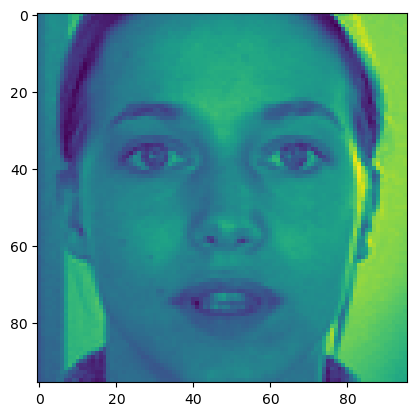

In [22]:
string = training.iloc[12,30]

img = np.fromstring(string, dtype=int, sep=' ')

img = np.reshape(img, (96, 96))
plt.imshow(img)

image.imsave('demo.png', img)

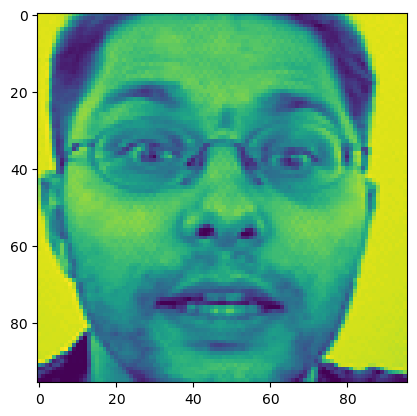

In [41]:
string = test.iloc[0,1]

image = np.fromstring(string, dtype=int, sep=' ')

image = np.reshape(image, (96, 96))

plt.imshow(image)

##  Create train_data.npy

In [23]:
# Filter out the data from train that is missing values (NaN)
filtered_training = training.dropna()
filtered_training.shape

(2140, 31)

In [24]:
train_data = StringtoArray(filtered_training, True)
print(train_data.shape)
save('data/train_data.npy', train_data)
#save('train_labels.npy', train_labels)

(2140, 96, 96)


##  Save train_labels.npy

In [56]:
train_labels = filtered_training.iloc[:,:-1].to_numpy()
print(train_labels.shape)
save('data/train_labels.npy', train_labels)

(2140, 30)


In [57]:
train_labels[0]

array([66.03356391, 39.00227368, 30.22700752, 36.4216782 , 59.58207519,
       39.64742256, 73.13034586, 39.96999699, 36.35657143, 37.3894015 ,
       23.45287218, 37.3894015 , 56.95326316, 29.03364812, 80.22712782,
       32.22813835, 40.22760902, 29.0023218 , 16.35637895, 29.64747068,
       44.42057143, 57.06680301, 61.19530827, 79.97016541, 28.61449624,
       77.38899248, 43.3126015 , 72.93545865, 43.13070677, 84.48577444])

##  Display image sample from npy 

[65.0514981  32.62722433 27.68851711 34.5464943  55.52961217 34.72535361
 75.21910266 33.43428137 38.09958935 35.53204563 18.41046388 36.66177947
 53.63589354 26.56389354 80.22205323 22.944      40.52039544 27.94695057
 14.37554373 28.26962738 45.68504943 54.41447909 61.33961977 73.45825095
 35.19476806 75.07236502 47.46013688 70.39209125 48.10585551 80.23665399]


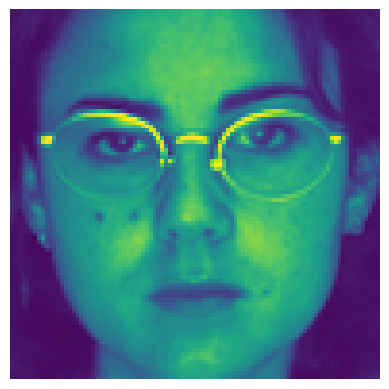

In [56]:
load_data = load('data/train_data.npy')
i = random.randint(0, len(load_data))
NPY_show(load_data[i])
load_labels = load('data/train_labels.npy')
print(load_labels[i])

## Display mage sample with face detection from npy

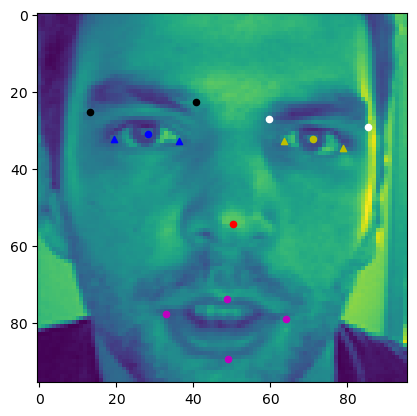

In [4]:
NPY_feature_show(load_data[i], load_labels[i])

## Image Data Augmentation 

In [68]:
def img_yflip(img_arr, label):
    
    new_img_arr = np.flip(img_arr,0)
    
    new_label = copy.deepcopy(label)
    new_label[[0,2]] = new_label[[2,0]]
    new_label[[1,3]]= new_label[[3,1]]

    new_label[[4,8]] = new_label[[8,4]]
    new_label[[5,9]] = new_label[[9,5]]
    new_label[[6,10]] = new_label[[10,6]]
    new_label[[7,11]] = new_label[[11,7]]

    new_label[[12,16]] = new_label[[16,12]]
    new_label[[13,17]] = new_label[[17,13]]
    new_label[[14,18]] = new_label[[18,14]]
    new_label[[15,19]] = new_label[[19,15]]

    new_label[[22,24]] = new_label[[24,22]]
    new_label[[23,25]] = new_label[[25,23]]

    new_label[1::2] = 95-new_label[1::2]
    
    return new_img_arr, new_label


def img_xflip(img_arr, label):
    
    new_img_arr = np.flip(img_arr,1)
    
    new_label = copy.deepcopy(label)
    new_label[[0,2]] = new_label[[2,0]]
    new_label[[1,3]]= new_label[[3,1]]

    new_label[[4,8]] = new_label[[8,4]]
    new_label[[5,9]] = new_label[[9,5]]
    new_label[[6,10]] = new_label[[10,6]]
    new_label[[7,11]] = new_label[[11,7]]

    new_label[[12,16]] = new_label[[16,12]]
    new_label[[13,17]] = new_label[[17,13]]
    new_label[[14,18]] = new_label[[18,14]]
    new_label[[15,19]] = new_label[[19,15]]

    new_label[[22,24]] = new_label[[24,22]]
    new_label[[23,25]] = new_label[[25,23]]

    new_label[::2] = 95-new_label[::2]
    
    return new_img_arr, new_label


def img_rotate(img_arr, label, angle):

    img = Image.fromarray(np.int8(img_arr))  # int8 to grayscale
    rotated = img.rotate(angle)
    new_img_arr = np.array(rotated)
    
    angle = angle/180* np.pi
    rotate_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                 [np.sin(angle), np.cos(angle)]])
    
    rotate = lambda t: np.dot(t-47.5, rotate_matrix)+47.5
    new_pos = np.array([rotate(x) for x in np.reshape(label,(15,2))])
    new_pos = np.reshape(new_pos, (30,))
    
    return new_img_arr, new_pos
 
    
## Gaussian Blur A 

def gaussian_func(x, y, sigma):
    '''
    To calculate the value of 2D gaussian function G(x, y, sigma)
    '''   
    return 1/(2*np.pi*sigma**2)*np.exp(-((x**2 + y**2)/(2*sigma**2)))


def gauss_kenerl(sigma, radius):
    '''
    To generate kernel/filter matrix(2*radius+1, 2*radius+1) for Gaussian blur with weight sigma 
    '''
    sum_weight = 0
    dim = 2*radius + 1
    
    for x in range(-radius, radius+1):
        for y in range(-radius, radius+1):
            sum_weight += gaussian_func(x, y, sigma)
    
    gauss_kenerl = np.zeros((dim, dim))
    
    for i in range(0, dim):
        for j in range(0, dim):
            gauss_kenerl[i][j] = gaussian_func(j-radius, i-radius, sigma)/sum_weight
    
    return gauss_kenerl

def img_blur(origin_data, labels, sigma, radius):
    '''
    Apply filter to the original image data, assigning the radius of the filter kernel,
    default gauss_kernel is the gauss_kernel matrix applied to the image, generated by def gauss_kenerl
    Return the blur filtered image data
    '''
    new_labels = copy.deepcopy(labels)
    
    dim = 2*radius + 1  # size of the kernel matrix
    
    size = origin_data.shape[0]

    origin_img_matrix_padding = np.zeros((size+2*radius, size+2*radius)) #padding the origin images, assign 0 to along the 4 edges for following filter step
    origin_img_matrix_padding[radius:size+radius,radius:size+radius] = np.reshape(origin_data,(size,size)) 
    # origin data reshape to 28x28 image data, inserted into the padding matrix
    
    blur_img_matrix = np.zeros((size,size)) # to store image data after blur filtered
    
    gauss_kernel = gauss_kenerl(sigma,radius)
    
    for i in range(0, size):
        for j in range(0, size):
            blur_img_matrix[i][j] = (origin_img_matrix_padding[i:i+dim, j:j+dim] * gauss_kernel).sum(axis=(0,1)) # apply filter kernel
                                                                                                                                              
    #blur_data = np.reshape(blur_img_matrix,(784,))  # reshape to the same shape as origin data    
    return blur_img_matrix, new_labels


## Gaussian Blur B

def img_blurb(img_arr, labels, sigma):
    blur_img = gaussian_filter(img_arr, sigma)
    new_labels = copy.deepcopy(labels)

    return blur_img, new_labels


def img_sp_noise(img_arr, labels, label=1, rand=0.1):
    '''
    return image array with salt or pepper noise, which decided by label (1-Salt, 2-pepper);
    rand is the noise ratio'''
    
    new_labels = copy.deepcopy(labels)
    
    row, column = img_arr.shape
    
    if label ==2:  # pepper mode
        
        
        noise_pepper = np.random.randint(0, 256, (row, column))
        noise_pepper = np.where(noise_pepper < rand * 256, -255, 0)
        pepper = img_arr + noise_pepper
        new_img_arr = np.where(pepper < 0, 0, pepper)
    
    else:  # default salt mode
        noise_salt = np.random.randint(0, 256, (row, column))
        noise_salt = np.where(noise_salt < rand * 256, 255, 0)
        salt = img_arr + noise_salt
        new_img_arr = np.where(salt > 255, 255, salt)
    
    return new_img_arr, new_labels


def img_gauss_noise(img_arr, labels, sd):
    
    '''
    sd is the standard deviation of the random normal distribution (Gaussian noise), mean is 0
    '''
    
    new_labels = copy.deepcopy(labels)
    row, column = img_arr.shape
    Gauss_noise = np.random.normal(0, sd, (row, column))
    Gauss = img_arr + Gauss_noise
    Gauss = np.where(Gauss < 0, 0, np.where(Gauss > 255, 255, Gauss))
    img_g_noise = Gauss.astype("int")  # if array is required to be int
    
    return img_g_noise, new_labels
    



## np.flip (horizontally symmetric)

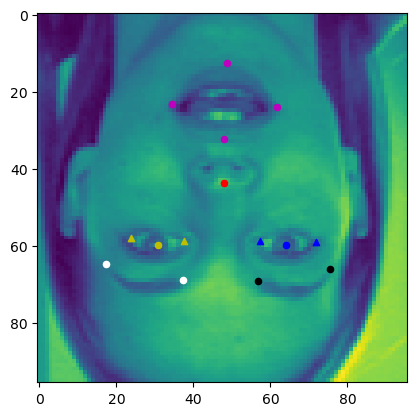

In [113]:

a, b = img_yflip(load_data[i], load_labels[i])

NPY_feature_show(a, b)


## np.flip (vertically symmetric) 

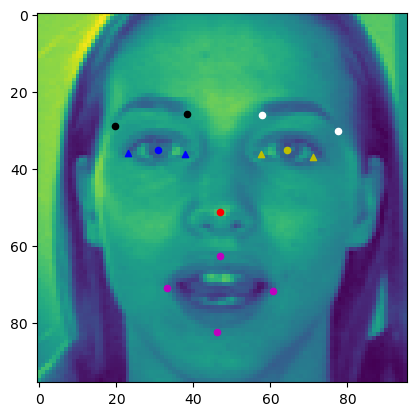

In [114]:
a, b = img_xflip(load_data[i], load_labels[i])
NPY_feature_show(a,b)


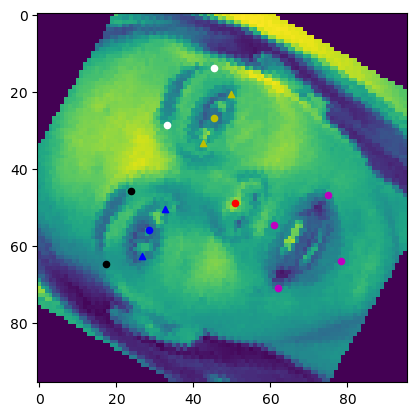

In [115]:
a,b = img_rotate(load_data[i], load_labels[i], 60)
NPY_feature_show(a, b)

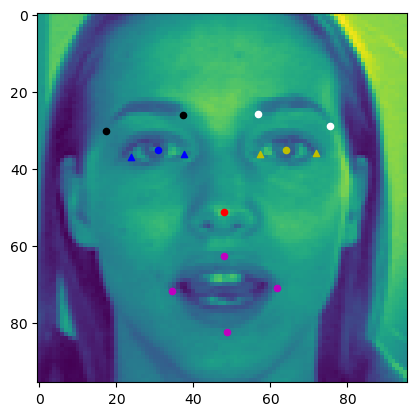

In [116]:
NPY_feature_show(load_data[i], load_labels[i])

## Blurring

### Method a

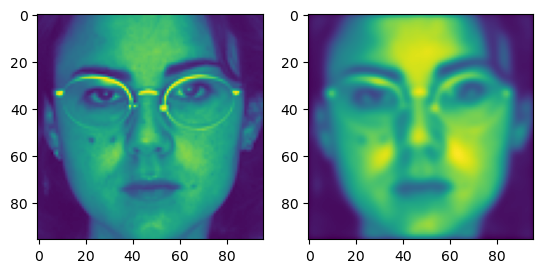

(96, 96)
<class 'numpy.ndarray'>


In [58]:
a,b = img_blur(load_data[i], load_labels[i], 1.5, 5)   # sigma = 1.5, radius =1 


## display
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(load_data[i])
ax2.imshow(a)
plt.show()

print(a.shape)
print(type(a))

## Method b

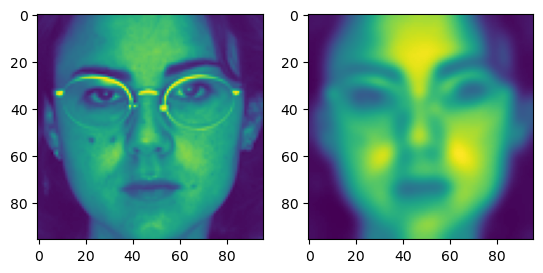

(96, 96)
<class 'numpy.ndarray'>
[[22 23 23 ... 25 26 26]
 [22 23 23 ... 25 26 26]
 [23 23 24 ... 25 26 26]
 ...
 [22 21 21 ... 23 24 24]
 [21 21 21 ... 24 25 25]
 [21 21 21 ... 24 25 26]]


In [74]:
a,b = img_blurb(load_data[i], load_labels[i], 2.5) # 0.1 2


## display part
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(load_data[i])
ax2.imshow(a)
plt.show()

print(a.shape)
print(type(a))
print(a)


## Salt and pepper noise

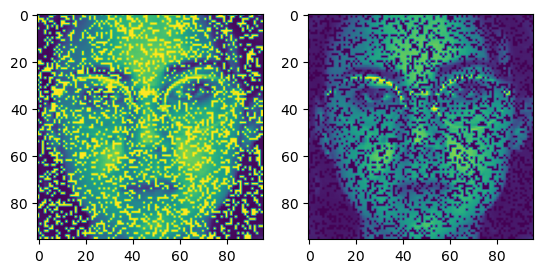

[[ 21  21  21 ...  23 255  32]
 [255  19  23 ...  25  24  27]
 [255 255 255 ... 255  24  25]
 ...
 [ 25 255  25 ... 255  25  26]
 [ 22  22 255 ...  26  27  28]
 [ 21 255  21 ...  30  35  39]]
[[21 21 21 ...  0  0 32]
 [ 0  0 23 ... 25  0 27]
 [20 21 27 ...  0 24 25]
 ...
 [ 0 25 25 ... 23  0 26]
 [22 22 23 ... 26 27  0]
 [21 21 21 ... 30 35 39]]


In [65]:

salt, b = img_sp_noise(load_data[i], load_labels[i], 1, 0.3)  # 0.3
pepper, d= img_sp_noise(load_data[i],load_labels[i], 2, 0.3)

## display part
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(salt)
ax2.imshow(pepper)
plt.show()

print(salt)
print(pepper)

##  Gaussian  noise

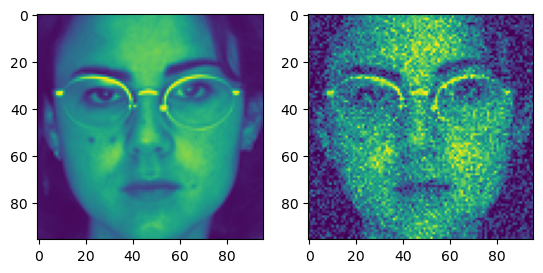

[[21 21 21 ... 23 28 32]
 [21 19 23 ... 25 24 27]
 [20 21 27 ... 30 24 25]
 ...
 [25 25 25 ... 23 25 26]
 [22 22 23 ... 26 27 28]
 [21 21 21 ... 30 35 39]]
[[30 73  0 ... 51 41 23]
 [36 47 61 ... 39 36  0]
 [60 40  0 ... 35 50 15]
 ...
 [18 15 42 ... 36  9 56]
 [80 45  0 ... 66  0 22]
 [10  0 31 ... 46 33 17]]


In [72]:
g_noise, b = img_gauss_noise(load_data[i], load_labels[i], 35)  # 30 or 35


fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(load_data[i])
ax2.imshow(g_noise)
plt.show()



print(load_data[i])
print(g_noise)


In [16]:
Gauss_noise = np.random.normal(0, 10, (5, 5))
print(Gauss_noise)

[[  1.04808935  16.34738464  -7.79481812  -4.12139167  -5.00929681]
 [ -0.84664932   7.59636269  30.60660811   7.56162287 -15.85764457]
 [ -0.39530847 -20.09609513   0.96160886  -0.77179718   3.80819024]
 [ -4.65635313  -1.25941298  -3.44038572 -10.99833617   7.05051466]
 [ -3.90074383  20.5297729  -18.91304037  -5.99126085   3.28117308]]
